<a href="https://colab.research.google.com/github/aliardakanian/docker/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#temp code

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
url="https://www.tradingview.com/symbols/GBPUSD/?exchange=FX"
import requests
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import models as md


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup

# Read the HTML file into a Pandas dataframe
soup = BeautifulSoup('https://finance.yahoo.com/quote/GBPUSD=X/history/?frequency=1d', 'html.parser')
tables = pd.read_html(str(soup))


#real code

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

table_MN = pd.read_csv('/content/BTC.csv')
#print(len(table_MN))
#print(table_MN.head(5))
#print(table_MN.tail())
table_MN['TDate']=pd.to_datetime(table_MN['date'])
table_MN=table_MN.drop(columns='date')
table_MN=table_MN.set_index(['TDate'])
print(table_MN.dtypes)

open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
trades                  int64
hour                    int64
open_log_returns      float64
high_log_returns      float64
low_log_returns       float64
close_log_returns     float64
volume_log_returns    float64
trades_log_returns    float64
dema                  float64
vwap                  float64
macd_signal_diffs     float64
rsi                   float64
stoch                 float64
cci                   float64
adx                   float64
aroon_up              float64
aroon_down            float64
bband_up              float64
bband_down            float64
obv                   float64
adl                   float64
close_dema            float64
close_vwap            float64
bband_up_close        float64
close_bband_down      float64
obv_diffs             float64
adl_diffs             float64
trends                float64
dtype: obj

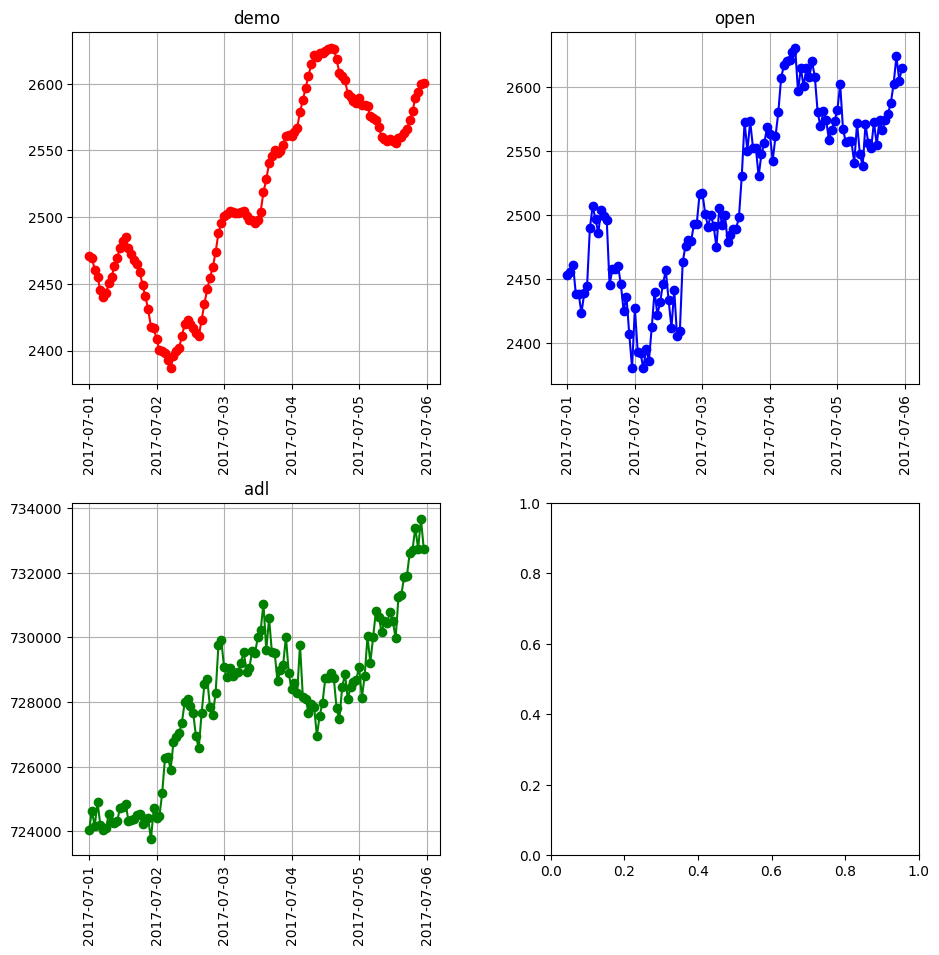

In [ ]:
#print(table_MN.dtypes)
#print(table_MN.head())
#table_MN['open-2']=table_MN['open'].shift(2)
mydata=table_MN.loc['2017']
mydatas=mydata.loc['2017-07-01':'2017-07-03'].groupby(pd.Grouper(freq='4h')).mean()
#print(mydatas.head(2))

#plt.plot(mydatas[['open','dema']] , c='b', marker='o')
#mydata['adl']=mydata['adl']/mydata['adl'].max()
#mydata['open']=mydata['open']/mydata['open'].max()
#mydata['dema']=mydata['dema']/mydata['dema'].max()
fig, ax = plt.subplots(2, 2)
fig.tight_layout(pad=2)
fig.set_size_inches(10,10)
ax[0,0].grid(['x','y'])
ax[0,0].plot(mydata[['dema']].loc['2017-07-01':'2017-07-5'], c='r', marker='o')
ax[0,0].set_title('demo')
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].set_title('open')
ax[0,1].plot(mydata[['open']].loc['2017-07-01':'2017-07-5'], c='b', marker='o')
ax[1,0].set_title('adl')
ax[1,0].plot(mydata[['adl']].loc['2017-07-01':'2017-07-5'], c='g', marker='o')
ax[0,1].grid(['x','y'])
ax[1,0].grid(['x','y'])

ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)


                        open      high      low     close       volume  \
TDate                                                                    
2017-01-02 10:00:00  1012.03  1019.290  1005.70  1018.669   933.716660   
2017-01-02 11:00:00  1014.99  1024.050  1010.65  1020.000   801.479693   
2017-01-02 12:00:00  1015.52  1033.936  1015.43  1024.840   830.528154   
2017-01-02 13:00:00  1024.84  1032.601  1020.55  1024.990   371.865450   
2017-01-02 14:00:00  1024.99  1031.989   998.72  1018.160  1204.366204   

                     trades  hour  open_log_returns  high_log_returns  \
TDate                                                                   
2017-01-02 10:00:00    1042    10          0.000020          0.003254   
2017-01-02 11:00:00    1179    11          0.002921          0.004659   
2017-01-02 12:00:00     991    12          0.000522          0.009608   
2017-01-02 13:00:00     814    13          0.009136         -0.001292   
2017-01-02 14:00:00    1602    14          

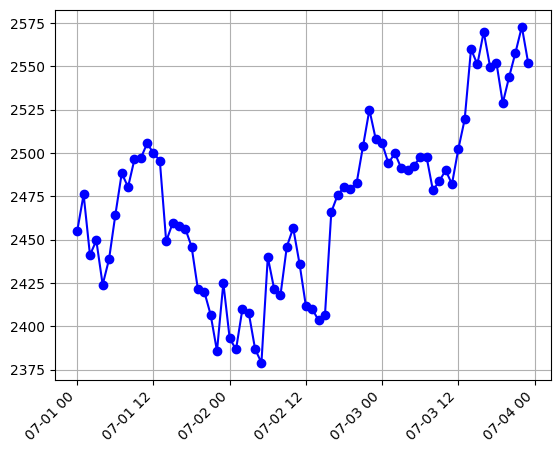

In [ ]:
import numpy as np
print(mydata.head(5))
plt.plot(mydata['close'].loc['2017-07-01':'2017-07-03'] , c='b', marker='o')
plt.xticks(rotation=45, ha='right')
plt.grid(['x','y'])

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random
class TradingEnv:
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size
        self.current_step = 0
        self.done = False

    def reset(self):
        self.current_step = 0
        self.done = False
        return self.get_state()

    def step(self, action):
        print(action)
        # 0: Hold, 1: Buy, 2: Sell
        if action == 1:  # Buy
            print("Buy")
            # Simulate buying logic
            # ...
        elif action == 2:  # Sell
            print("Sell")
            # Simulate selling logic
            # ...

        self.current_step += 1
        if self.current_step >= len(self.data) - self.window_size - 1:
            self.done = True

        reward = self.calculate_reward(action)
        next_state = self.get_state()

        return next_state, reward, self.done, {}

    def get_state(self):
        # Return the current state (e.g., a window of prices)
        window_start = self.current_step
        window_end = window_start + self.window_size
        state = self.data['close'][window_start:window_end].values
        return state

    def calculate_reward(self, action):
        # Calculate the reward based on the action and market changes
        # ... Your reward function logic here ...
        # Example:
        if action == 1:  # Buy
            # Reward based on price increase
            reward = self.data['close'][self.current_step + self.window_size] - self.data['close'][self.current_step + self.window_size - 1]
        elif action == 2:  # Sell
            # Reward based on price decrease
            reward = self.data['close'][self.current_step + self.window_size - 1] - self.data['close'][self.current_step + self.window_size]
        else:
            reward = 0  # Hold
        return reward

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []  # Experience replay buffer
        self.gamma = 0.95    # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # Returns action
#nafahmidam....
    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


# Assuming you have your data in 'mydata' and window_size is defined
window_size = 10  # Example window size
mydatas=mydata.loc['2017-07-01':'2017-07-10']
env = TradingEnv(mydatas, window_size)
state_size = window_size  # State size is the window size
action_size = 3  # Hold, Buy, Sell
agent = DQNAgent(state_size, action_size)
batch_size = 32
num_episodes = 1  # Number of training episodes
print(mydatas['close'].head(10))
for episode in range(num_episodes):
    state = env.reset()
    print(state)
    state = np.reshape(state, [1, state_size])  # Reshape for model input
    done = False
    total_reward = 0
    done=True
    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)

    print(f"Episode: {episode + 1}/{num_episodes}, Total Reward: {total_reward}")


#x=TradingEnv(mydatas,5)
#print(x.get_state())
#print(x.calculate_reward(2))



TDate
2017-07-01 00:00:00    2455.190
2017-07-01 01:00:00    2476.080
2017-07-01 02:00:00    2441.110
2017-07-01 03:00:00    2449.560
2017-07-01 04:00:00    2424.000
2017-07-01 05:00:00    2438.663
2017-07-01 06:00:00    2464.410
2017-07-01 07:00:00    2488.300
2017-07-01 08:00:00    2480.434
2017-07-01 09:00:00    2496.320
Name: close, dtype: float64
[2455.19  2476.08  2441.11  2449.56  2424.    2438.663 2464.41  2488.3
 2480.434 2496.32 ]
Episode: 1/1, Total Reward: 0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
